In [1]:
#import necessary libararies
import pandas as pd
import sklearn
import numpy as np
#import historical and news articles data set
df1=pd.read_csv("News_articles_dataset.csv",parse_dates=["Date"])
df2=pd.read_csv("HistoricalData_1623748350213.csv",parse_dates=["Date"])

In [2]:
#check if any null values are present in news articles dataset
df1.isnull().sum()

Date         0
Headlines    0
dtype: int64

In [3]:
#sort the data
df1.sort_index(inplace=True)

In [4]:
df1.head()

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-02-01,What to expect from Apple in 2015 beyond its s...
2,2015-03-01,Mountie: An inexpensive and innovative way to ...
3,2015-04-01,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."


In [5]:
df2.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-14,$130.48,96906490,$127.82,$130.54,$127.07
1,2021-06-11,$127.35,53522370,$126.53,$127.44,$126.1
2,2021-06-10,$126.11,71186420,$127.02,$128.19,$125.94
3,2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
4,2021-06-08,$126.74,74403770,$126.6,$128.46,$126.2101


In [6]:
#sort the historical data wrt date
df2.sort_values('Date',inplace=True)

In [7]:
df2.reset_index()

,index,Date,Close/Last,Volume,Open,High,Low
0,2515,2011-06-15,$11.6696,395841722,$11.7768,$11.7964,$11.6029
1,2514,2011-06-16,$11.6129,507299317,$11.675,$11.7386,$11.3689
2,2513,2011-06-17,$11.4379,614859874,$11.7496,$11.7589,$11.4057
3,2512,2011-06-20,$11.2614,639595904,$11.3341,$11.3464,$11.0893
4,2511,2011-06-21,$11.6179,492451483,$11.31,$11.6357,$11.2571
...,...,...,...,...,...,...,...
2511,4,2021-06-08,$126.74,74403770,$126.6,$128.46,$126.2101
2512,3,2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
2513,2,2021-06-10,$126.11,71186420,$127.02,$128.19,$125.94
2514,1,2021-06-11,$127.35,53522370,$126.53,$127.44,$126.1


In [8]:
#Merging both the datasets wrt date
a=pd.merge(df1,df2,how='inner',on=['Date'])

a.index=a['Date']

In [9]:
#replace $ with space and change into type float 
a["Close/Last"]=a["Close/Last"].str.replace('$', '').astype(float)
a.head()

,Date,Headlines,Close/Last,Volume,Open,High,Low
Date,,,,,,,
2015-04-01,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",31.0625,161852560,$31.205,$31.28,$30.775
2015-05-01,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",32.2375,229396000,$31.525,$32.5325,$31.325
2015-06-01,2015-06-01,"Technology Transforming Cars Into ""Phones On W...",32.6337,128064080,$32.8,$32.8475,$32.5125
2015-07-01,2015-07-01,Apple issues fourth developer beta of OS X 10....,31.6500,120827560,$31.725,$31.735,$31.4975
2015-09-01,2015-09-01,Samsung is reportedly making a secret new chip...,26.9300,306248680,$27.5375,$27.97,$26.84


In [10]:
a.drop('Date',axis=1,inplace=True)

In [11]:
a.head()

,Headlines,Close/Last,Volume,Open,High,Low
Date,,,,,,
2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",31.0625,161852560,$31.205,$31.28,$30.775
2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",32.2375,229396000,$31.525,$32.5325,$31.325
2015-06-01,"Technology Transforming Cars Into ""Phones On W...",32.6337,128064080,$32.8,$32.8475,$32.5125
2015-07-01,Apple issues fourth developer beta of OS X 10....,31.6500,120827560,$31.725,$31.735,$31.4975
2015-09-01,Samsung is reportedly making a secret new chip...,26.9300,306248680,$27.5375,$27.97,$26.84


In [12]:
#drop date after making date as index
a.drop(['Volume','Open','High','Low'],axis=1,inplace=True)

In [13]:
a.head()

,Headlines,Close/Last
Date,,
2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",31.0625
2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",32.2375
2015-06-01,"Technology Transforming Cars Into ""Phones On W...",32.6337
2015-07-01,Apple issues fourth developer beta of OS X 10....,31.6500
2015-09-01,Samsung is reportedly making a secret new chip...,26.9300


In [14]:
#create four new columns compound, positive,negative and neutral
a['compound']=''
a['positive']=''
a['negative']=''
a['neutral']=''
a.head()

,Headlines,Close/Last,compound,positive,negative,neutral
Date,,,,,,
2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",31.0625,,,,
2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",32.2375,,,,
2015-06-01,"Technology Transforming Cars Into ""Phones On W...",32.6337,,,,
2015-07-01,Apple issues fourth developer beta of OS X 10....,31.6500,,,,
2015-09-01,Samsung is reportedly making a secret new chip...,26.9300,,,,


In [15]:
#headlines preprocessing
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
a['compound'] = a['Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
a['negative'] = a['Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
a['neutral'] = a['Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
a['positive'] = a['Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the stock data
a.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Headlines,Close/Last,compound,positive,negative,neutral
Date,,,,,,
2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",31.0625,-0.5330,0.052,0.074,0.874
2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",32.2375,0.9949,0.112,0.020,0.868
2015-06-01,"Technology Transforming Cars Into ""Phones On W...",32.6337,0.6189,0.055,0.049,0.897
2015-07-01,Apple issues fourth developer beta of OS X 10....,31.6500,-0.8334,0.062,0.074,0.865
2015-09-01,Samsung is reportedly making a secret new chip...,26.9300,0.9951,0.124,0.055,0.821


In [16]:
#drop headlines column
a.drop('Headlines',axis=1,inplace=True)
a.head()

,Close/Last,compound,positive,negative,neutral
Date,,,,,
2015-04-01,31.0625,-0.5330,0.052,0.074,0.874
2015-05-01,32.2375,0.9949,0.112,0.020,0.868
2015-06-01,32.6337,0.6189,0.055,0.049,0.897
2015-07-01,31.6500,-0.8334,0.062,0.074,0.865
2015-09-01,26.9300,0.9951,0.124,0.055,0.821


In [17]:
#create another column of previous day close price
a['close_price'] = a['Close/Last'].shift(1) 

In [18]:
a.head()

,Close/Last,compound,positive,negative,neutral,close_price
Date,,,,,,
2015-04-01,31.0625,-0.5330,0.052,0.074,0.874,NaN
2015-05-01,32.2375,0.9949,0.112,0.020,0.868,31.0625
2015-06-01,32.6337,0.6189,0.055,0.049,0.897,32.2375
2015-07-01,31.6500,-0.8334,0.062,0.074,0.865,32.6337
2015-09-01,26.9300,0.9951,0.124,0.055,0.821,31.6500


In [19]:
#calculate the diff between previous and present days closed price
a['closed_price_diff']=''
a['closed_price_diff']=a['Close/Last']-a['close_price']

In [20]:
a.head()

,Close/Last,compound,positive,negative,neutral,close_price,closed_price_diff
Date,,,,,,,
2015-04-01,31.0625,-0.5330,0.052,0.074,0.874,NaN,NaN
2015-05-01,32.2375,0.9949,0.112,0.020,0.868,31.0625,1.1750
2015-06-01,32.6337,0.6189,0.055,0.049,0.897,32.2375,0.3962
2015-07-01,31.6500,-0.8334,0.062,0.074,0.865,32.6337,-0.9837
2015-09-01,26.9300,0.9951,0.124,0.055,0.821,31.6500,-4.7200


In [21]:
#another column where 1 if the diff is +ve and 0 if -ve
a['profit/loss']=''
a['profit/loss'] = a['closed_price_diff'].apply(lambda x: 1 if x>0 else 0)

In [22]:
a.head()

,Close/Last,compound,positive,negative,neutral,close_price,closed_price_diff,profit/loss
Date,,,,,,,,
2015-04-01,31.0625,-0.5330,0.052,0.074,0.874,NaN,NaN,0
2015-05-01,32.2375,0.9949,0.112,0.020,0.868,31.0625,1.1750,1
2015-06-01,32.6337,0.6189,0.055,0.049,0.897,32.2375,0.3962,1
2015-07-01,31.6500,-0.8334,0.062,0.074,0.865,32.6337,-0.9837,0
2015-09-01,26.9300,0.9951,0.124,0.055,0.821,31.6500,-4.7200,0


In [23]:
a.drop(a.index[[0]],inplace=True)

In [24]:
a.head()

,Close/Last,compound,positive,negative,neutral,close_price,closed_price_diff,profit/loss
Date,,,,,,,,
2015-05-01,32.2375,0.9949,0.112,0.020,0.868,31.0625,1.1750,1
2015-06-01,32.6337,0.6189,0.055,0.049,0.897,32.2375,0.3962,1
2015-07-01,31.6500,-0.8334,0.062,0.074,0.865,32.6337,-0.9837,0
2015-09-01,26.9300,0.9951,0.124,0.055,0.821,31.6500,-4.7200,0
2015-10-01,27.3950,0.9070,0.134,0.069,0.797,26.9300,0.4650,1


In [25]:
#drop all unnecessaary columns
a.drop(['Close/Last','compound','close_price','closed_price_diff'],inplace=True,axis=1)

In [26]:
a.head()

,positive,negative,neutral,profit/loss
Date,,,,
2015-05-01,0.112,0.020,0.868,1
2015-06-01,0.055,0.049,0.897,1
2015-07-01,0.062,0.074,0.865,0
2015-09-01,0.124,0.055,0.821,0
2015-10-01,0.134,0.069,0.797,1


In [27]:
#first three columns are considered as x
x=a.iloc[:,:-1]
x
cols = ['positive','negative','neutral']

In [28]:
#last column is categorical variable
y=a['profit/loss']
y

Date
2015-05-01    1
2015-06-01    1
2015-07-01    0
2015-09-01    0
2015-10-01    1
             ..
2021-05-28    0
2021-01-06    1
2021-04-06    0
2021-05-06    1
2021-06-14    1
Name: profit/loss, Length: 1595, dtype: int64

In [29]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(0, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(0, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[0.46280992, 0.08298755, 0.60479042],
        [0.22727273, 0.2033195 , 0.69161677],
        [0.25619835, 0.30705394, 0.59580838],
        ...,
        [0.30991736, 0.09958506, 0.70359281],
        [0.38016529, 0.17842324, 0.59580838],
        [0.38429752, 0.21161826, 0.56586826]]),
 array([[1.],
        [1.],
        [0.],
        ...,
        [0.],
        [1.],
        [1.]]))

In [30]:
#split data into train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 

In [31]:
#splitting data into train test manually
#x_train = x[:80]
#y_train = y[:80]
#x_test= x[80:]
#y_test= y[80:]

In [32]:
#naive bayes model
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

C:\Users\Dell\New folder\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
#prediction
y_pred=model.predict(x_test)

In [34]:
y_pred

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [37]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.5109717868338558

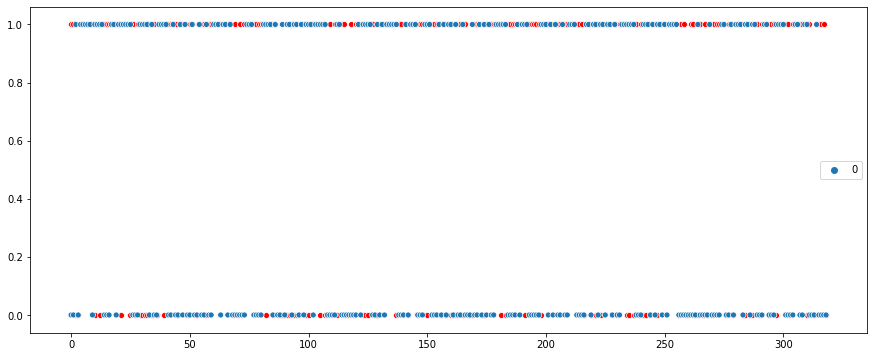

In [41]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.scatterplot(data=y_pred,color="r",size_order=2014)
sns.scatterplot(data=y_test,color="b",size_order=2014)